In [39]:
import os
import json
import re

import pandas as pd

In [22]:
json_data = json.load(open('../res/data/10minutemail.json'))

In [23]:
json_data['points']

['5309', '5310']

In [64]:
def get_table_data(filename, json_data):
    table_data = []
    
    for p in json_data['points']:
        point = json_data['pointsData'][p]
        if 'quoteText' in point.keys():

            result = point['quoteText'].replace("\n", " ")

            regex = r"<[^>]*>"
            subst = ""
            result = re.sub(regex, subst, result, 0, re.MULTILINE)
            print(result)

            result = result.strip().lower()

            table_data.append({
                'data': result,
                'score': point['tosdr']['score'],
                'class': point['tosdr']['point'],
                'filename': filename
            })
            
    return table_data

In [ ]:
all_data = []
for f in os.listdir('../res/data'):
    print(f"======={f}===========")
    json_data = json.load(open(f'../res/data/{f}'))
    
    srv_table_data = get_table_data(f, json_data)
    all_data.extend(srv_table_data)

In [67]:
df = pd.DataFrame(all_data)

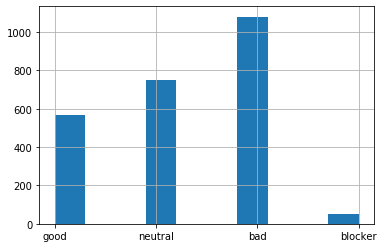

In [69]:
%matplotlib inline
df['class'].hist()

In [70]:
df['score'] = df['score'].astype('int')

In [71]:
df.head()

,data,score,class,filename
0,"signal does not sell, rent or monetize your pe...",25,good,signal.json
1,you must be at least 13 years old to use our s...,15,neutral,signal.json
2,you agree to resolve any claim you have with u...,0,neutral,signal.json
3,"we may modify, suspend, or terminate your acce...",60,bad,signal.json
4,we work with third parties to provide some of ...,15,bad,signal.json


In [73]:
df.loc[df.score>70]

,data,score,class,filename
117,gitlab is an open source project,90,good,gitlab.json
188,apple and our partners and licensees may colle...,75,bad,apple.json
193,we may collect information about the general l...,80,bad,newegg-com.json
198,"when you post or transmit content on, to, or t...",80,bad,newegg-com.json
218,no personal data is kept in logs for more than...,80,good,jetbrains.json
...,...,...,...,...
2374,we may retain access logs containing this data...,80,good,openhumans.json
2408,other information we collect: website: when ...,100,good,goodtodo.json
2418,all our titles are published under the most fl...,90,good,openbookpublishers.json
2437,we do not use cookies or any other tracking te...,100,good,tos;dr.json


In [74]:
df.to_csv('../res/processed-data/tos.csv')